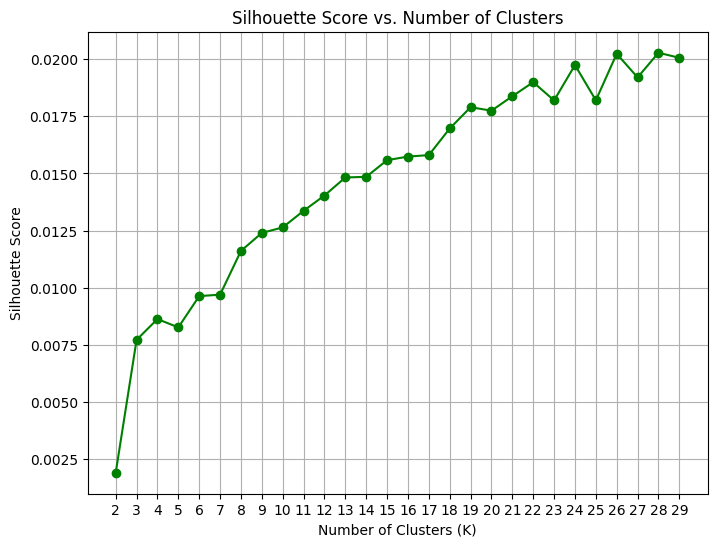

Probable Optimal K: 4


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with actual path
df = pd.read_csv(csv_file_path)

# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
text_vectors = vectorizer.fit_transform(df["text"])

# Try different K values
k_values = range(2, 30)  # Start from K=2 (Silhouette Score isn't valid for K=1)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(text_vectors)
    score = silhouette_score(text_vectors, cluster_labels)
    silhouette_scores.append(score)
    
# Find optimal K: Ignore first drop, then find last increasing K
optimal_k = k_values[1]  # Start with k=2

for i in range(1, len(silhouette_scores) - 1):
    if silhouette_scores[i] < silhouette_scores[i - 1]:  # If it decreases, take previous K
        optimal_k = k_values[i - 1]
        break

# Plot Silhouette Score graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker="o", linestyle="-", color="g")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.xticks(k_values)
plt.grid()
plt.show()

print(f"Probable Optimal K: {optimal_k}")
